In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [4]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

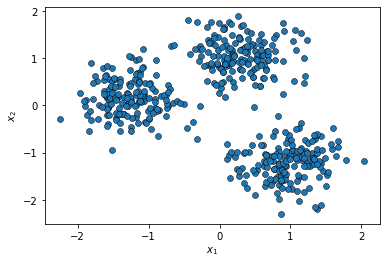

In [5]:
plot_data(X)
plt.savefig('figures/blobs_data.pdf')

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

In [7]:
def print_cluster_stats(dbscan):
    labels = dbscan.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_points = np.count_nonzero(labels == -1)

    print('Number of clusters:', n_clusters)
    print('Number of noise points:', n_noise_points)

In [8]:
print_cluster_stats(dbscan)

Number of clusters: 1
Number of noise points: 0


In [9]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)

DBSCAN(eps=0.3)

In [10]:
print_cluster_stats(dbscan)

Number of clusters: 3
Number of noise points: 14


In [11]:
def plot_clusters(X, dbscan):
    labels = dbscan.labels_
    
    # Identify the border points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    border_samples_mask = ~core_samples_mask & (labels != -1)
   
    # Identify the noise points
    noise_samples_mask = (labels == -1)
    noise_points = X[noise_samples_mask]
    
    # Assign a different dot size for each type of point
    sizes = np.zeros_like(labels, dtype=int)
    sizes[core_samples_mask] = 100
    sizes[border_samples_mask] = 50
    sizes[noise_samples_mask] = 25
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', 
                    s=sizes, legend=False)
    
    # Draw the noise points in black
    sns.scatterplot(x=noise_points[:, 0], y=noise_points[:, 1], color='k', legend=False)
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

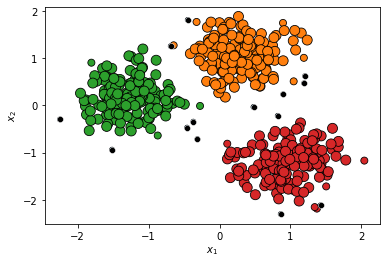

In [12]:
plot_clusters(X, dbscan)
plt.savefig('figures/blobs_dbscan.pdf')

K-Distance Graph

In [13]:
from sklearn.metrics import pairwise_distances

def plot_k_distance_graph(X, k):
    # Compute pairwise distances between the points (using Euclidean distance)
    distances = pairwise_distances(X)
    
    # Sort the distances for each point
    sorted_distances = np.sort(distances, axis=1)
    
    # Get the distance of each point to its k-nearest neighbor
    k_distances = sorted_distances[:, k]
    
    # Sort the k-distances
    sorted_k_distances = np.sort(k_distances)
    
    # Plot the k-distance graph
    plt.plot(sorted_k_distances)
    plt.xlabel('Data Point Index')
    plt.ylabel(f'{k}-Distance')
    plt.grid()

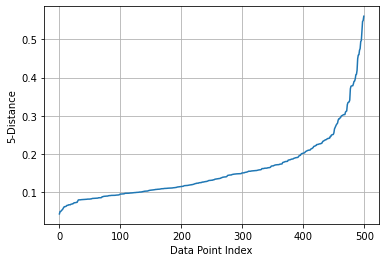

In [14]:
plot_k_distance_graph(X, k=5)
plt.savefig('figures/k_distance_graph.pdf')

Moons dataset

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

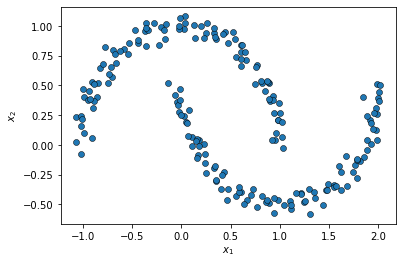

In [16]:
plot_data(X)
plt.savefig('figures/moons_data.pdf')

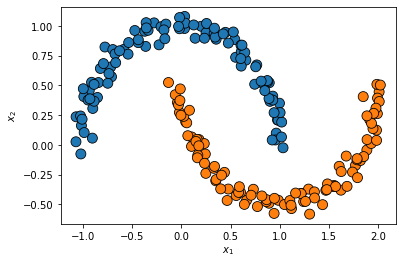

In [17]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clusters(X, dbscan)
plt.savefig('figures/moons_dbscan.pdf')